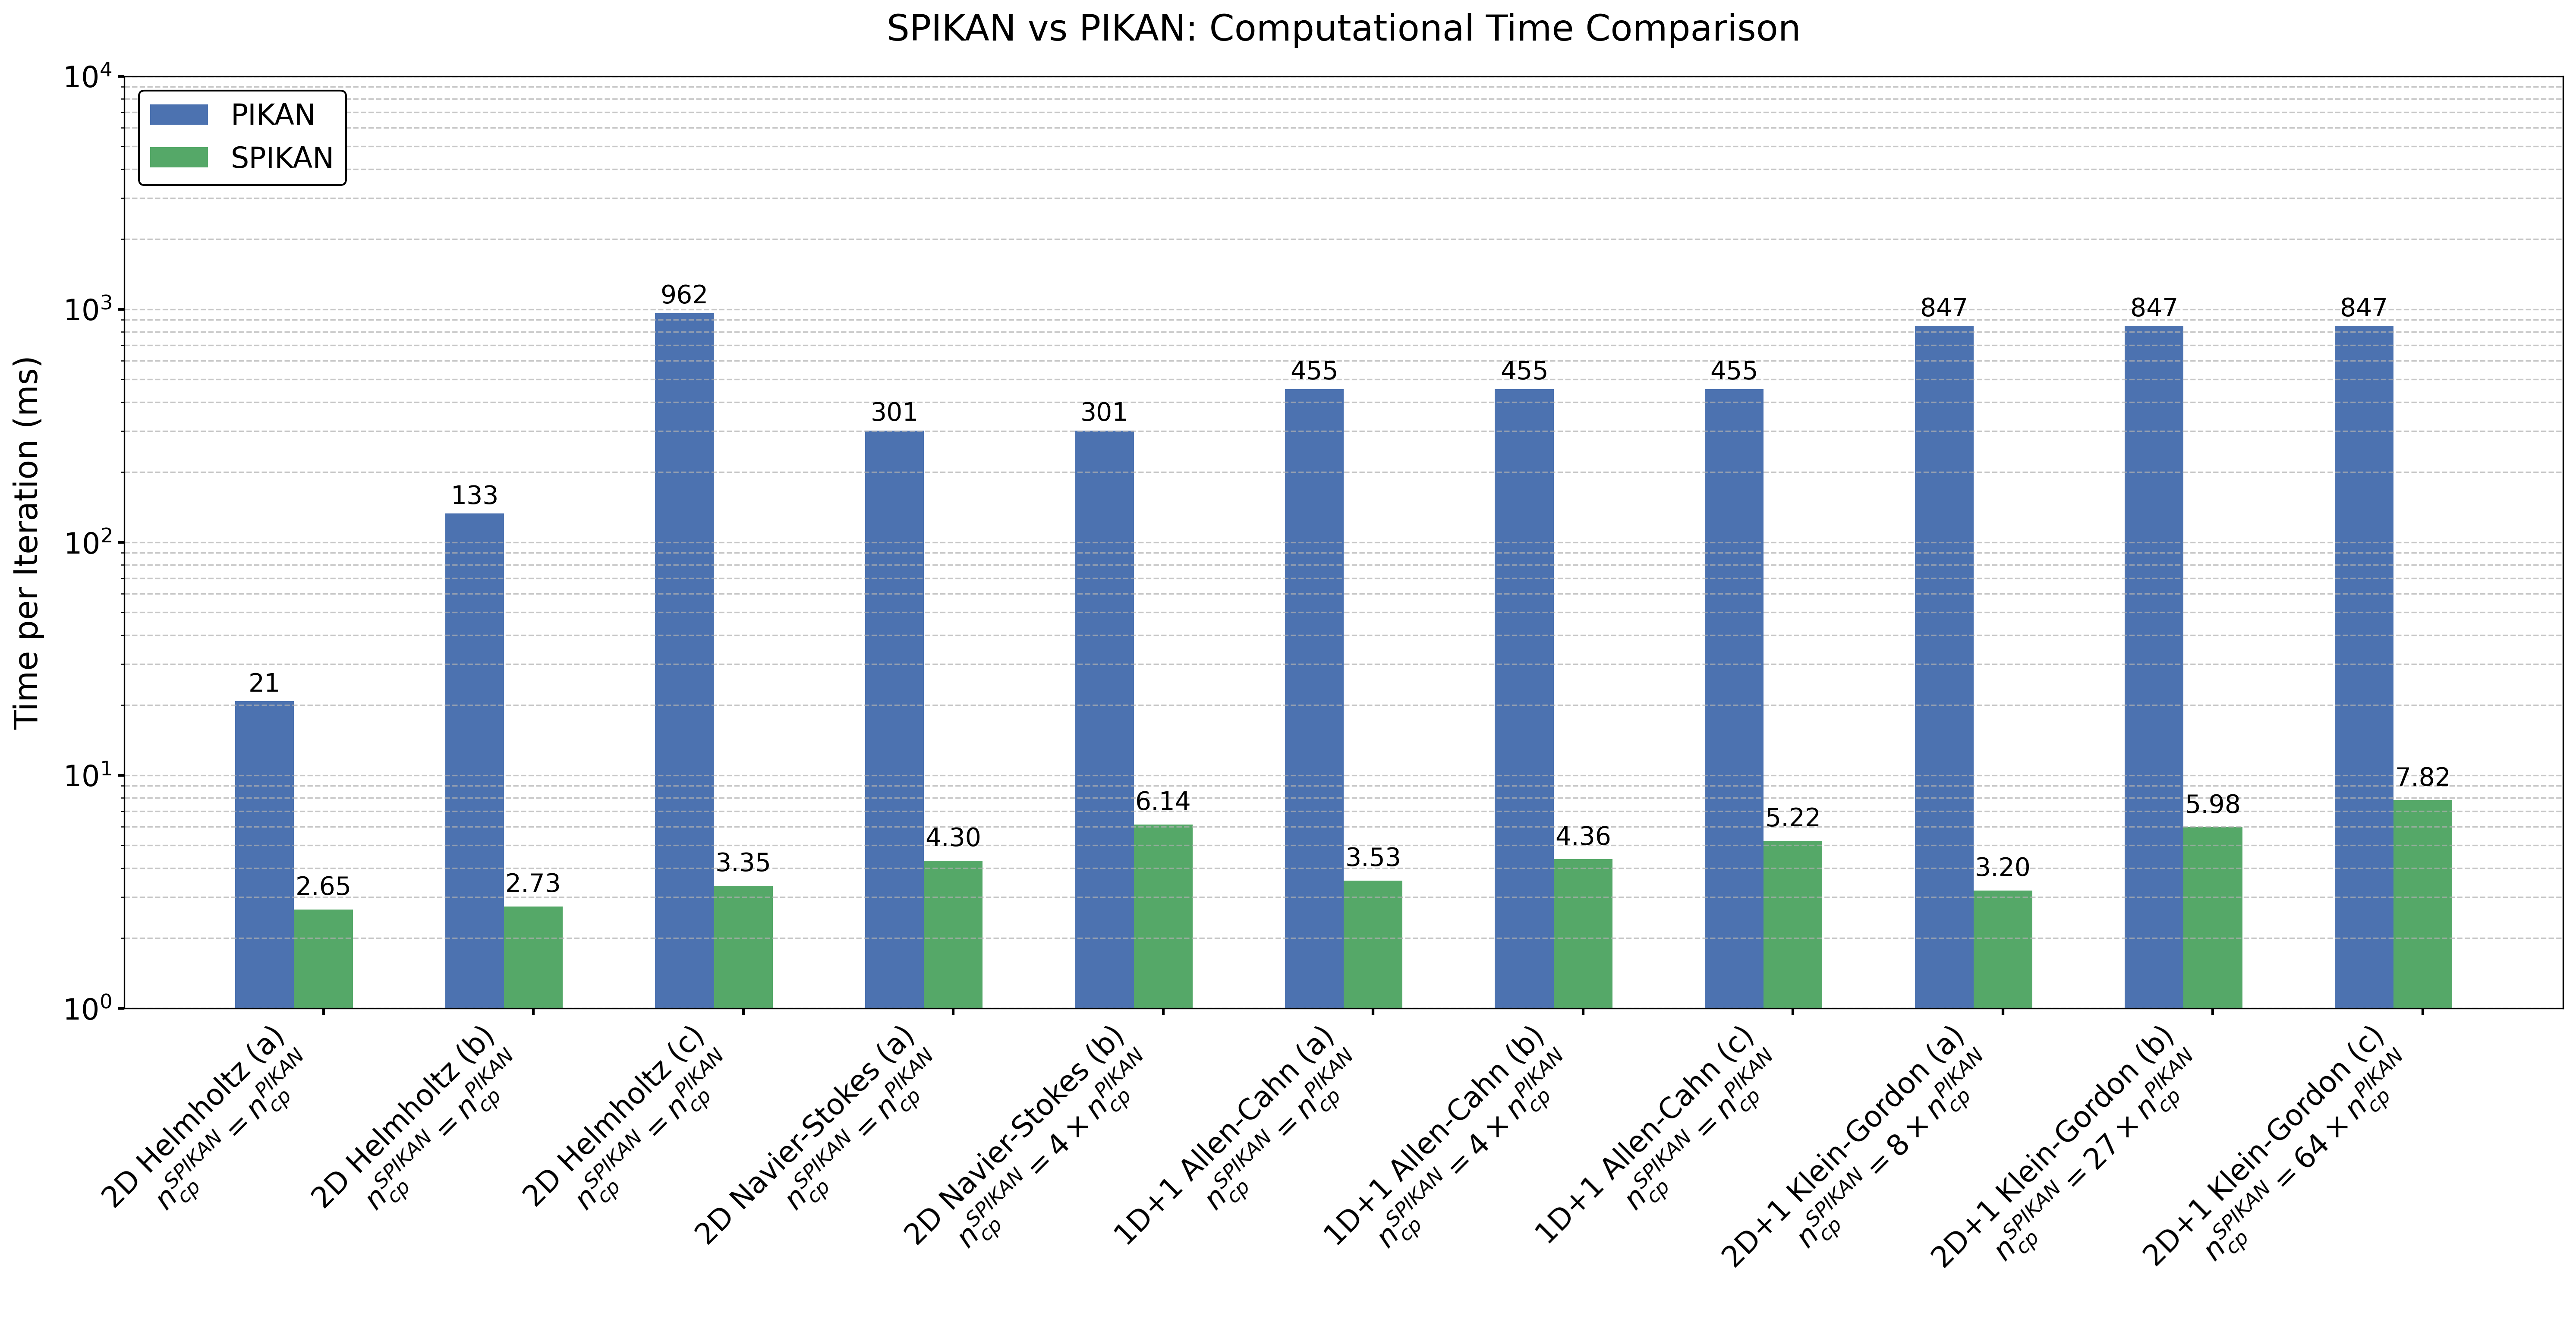

In [9]:
# Data preparation
problems = [
    '2D Helmholtz (a)\n$n_{cp}^{SPIKAN} = n_{cp}^{PIKAN}$',
    '2D Helmholtz (b)\n$n_{cp}^{SPIKAN} = n_{cp}^{PIKAN}$',
    '2D Helmholtz (c)\n$n_{cp}^{SPIKAN} = n_{cp}^{PIKAN}$',
    '2D Navier-Stokes (a)\n$n_{cp}^{SPIKAN} = n_{cp}^{PIKAN}$',
    '2D Navier-Stokes (b)\n$n_{cp}^{SPIKAN} = 4 \\times n_{cp}^{PIKAN}$',
    '1D+1 Allen-Cahn (a)\n$n_{cp}^{SPIKAN} = n_{cp}^{PIKAN}$',
    '1D+1 Allen-Cahn (b)\n$n_{cp}^{SPIKAN} = 4 \\times n_{cp}^{PIKAN}$',
    '1D+1 Allen-Cahn (c)\n$n_{cp}^{SPIKAN} = n_{cp}^{PIKAN}$',
    '2D+1 Klein-Gordon (a)\n$n_{cp}^{SPIKAN} = 8 \\times n_{cp}^{PIKAN}$',
    '2D+1 Klein-Gordon (b)\n$n_{cp}^{SPIKAN} = 27 \\times n_{cp}^{PIKAN}$',
    '2D+1 Klein-Gordon (c)\n$n_{cp}^{SPIKAN} = 64 \\times n_{cp}^{PIKAN}$'
]

# Time per iteration (ms) and speedup
pikan_times = [20.75, 132.63, 961.54, 301.20, 301.20, 454.54, 454.54, 454.54, 847.45, 847.45, 847.45]
spikan_times = [2.65, 2.73, 3.35, 4.3, 6.14, 3.53, 4.36, 5.22, 3.20, 5.98, 7.82]
speedups = [7.8, 48.6, 287.0, 70.05, 49.05, 128.76, 104.25, 87.08, 264.83, 141.71, 108.37]

# Number of problems
x = np.arange(len(problems)) * 1.5
width = 0.42

# Create figure and axis
plt.rcParams['figure.dpi'] = 300
fig, ax1 = plt.subplots(figsize=(20, 10))

# Create secondary y-axis
# ax2 = ax1.twinx()

# Plot bars
bars1 = ax1.bar(x - width, pikan_times, width, label='PIKAN', color='#4C72B0')
bars2 = ax1.bar(x, spikan_times, width, label='SPIKAN', color='#55A868')
# bars3 = ax2.bar(x + width, speedups, width, label='Speedup', color='#C44E52')

# Set y-axis scales and labels
ax1.set_yscale('log')
ax1.set_ylabel('Time per Iteration (ms)', fontsize=18, color='black', labelpad=10)
ax1.tick_params(axis='y', labelsize=16, colors='black', width=1.5)
ax2.set_ylabel('Speedup (×)', fontsize=18, color='black', labelpad=10)
ax2.tick_params(axis='y', labelsize=16, colors='black', width=1.5)

# Set y-axis limits
ax1.set_ylim(1, 10000)
# ax2.set_ylim(0, max(speedups) * 1.2)

# Set title and configure x-axis
ax1.set_title('SPIKAN vs PIKAN: Computational Time Comparison', fontsize=20, color='black', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(problems, rotation=45, ha='right', fontsize=16, color='black')
ax1.tick_params(axis='x', width=1.5)

# Add grid lines
ax1.grid(True, which="both", axis='y', linestyle='--', linewidth=0.8, alpha=0.7)

# Function to add value labels on bars
def autolabel(ax, bars):
    for bar in bars:
        height = bar.get_height()
        if height < 10:
            ax.text(bar.get_x() + bar.get_width()/2, height*1.1,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=14, color='black')
        else:
            ax.text(bar.get_x() + bar.get_width()/2, height*1.05,
                    f'{height:.0f}',
                    ha='center', va='bottom', fontsize=14, color='black')

# Add value labels
autolabel(ax1, bars1)
autolabel(ax1, bars2)

# # Add speedup labels with '×' symbol
# for bar in bars3:
#     height = bar.get_height()
#     ax2.text(bar.get_x() + bar.get_width()/2, height*1.05,
#             f'{height:.0f}×',
#             ha='center', va='bottom', fontsize=14, color='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', 
           fontsize=16, edgecolor='black', framealpha=1)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.2)

# Save the figure
plt.savefig(
    './comparison_computational_time.png',
    format='png',
    dpi=600,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white',
    edgecolor='none'
)

plt.show()